# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This project is based on HR dataset. Its goal is to find out what are the reasons behind employees leaving company.

Project involves:

    1. Data cleaning
    2. Exploratory data analysis
    3. Data visualisation with seaborn and matplotlib
    4. Model building (Logistic regresion, Decision Tree and Random Forest)
    5. Feature engeneering.
    


# **PACE stages** 
## Plan, Analyse, Construct, Execute


## Plan stage:

### Project Goal:

Identifiy the reasons behind employees leaving the company and find solution to the problem which will minimise number of employees resigning.


### HR dataset overview:

The dataset contains 15,000 rows and 10 columns for the variables listed below. 

For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

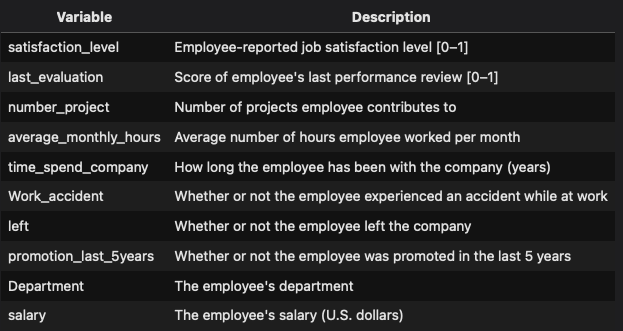

## Step 1. Imports

*   Importing packages
*   Loading dataset



### Importing packages:

In [2]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Loading dataset

`Pandas` is used to read a dataset called `HR_comma_sep.csv`.

In [3]:
# Loading dataset into a dataframe
df0 = pd.read_csv("HR_comma_sep.csv")


# Displaying first few rows of the dataframe
df0.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

* Understanding variables
* Data cleaning



### Basic information overview:

In [4]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Obtaining descriptive statistics about the data:

In [5]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Renaming columns:

As a data cleaning step, columns will be renamed so that they are all in `snake_case` format:

In [6]:
# Displaying all column names
df0.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [7]:
# Renameing columns as needed
df0 = df0.rename(columns={'Work_accident':'work_accident',
                   'Department': 'department',
                   'time_spend_company':'tenure',
                   'average_montly_hours':'average_monthly_hours'}
                   )

# Checking
df0.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Checking for missing values:

In [8]:
df0.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

### Checking for duplicates:

In [9]:
df0.duplicated().sum()

3008

In [10]:
# Inspecting rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


In [11]:
#Dropping duplicates
df1 = df0.drop_duplicates(keep='first')

df1.head(15)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Checking for outliers:

Text(0.5, 1.0, 'Tenure boxplot')

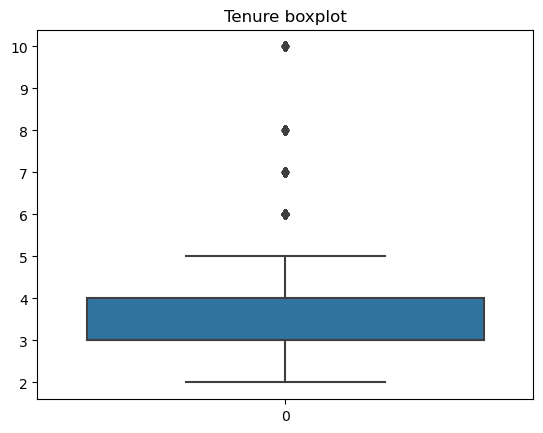

In [12]:
# Creating boxplot with seaborn library
box_plt1 = sns.boxplot(df1['tenure'])
box_plt1.set_title('Tenure boxplot')



In [13]:
# Determining the number of rows containing outliers
#Interquartaile range calculation:
percentile25 = df1['tenure'].quantile(0.25)
percentile75 = df1['tenure'].quantile(0.75)
iqr = percentile75-percentile25

#Establishing limits:
up_lim = percentile75 + 1.5 * iqr
low_lim = percentile25 - 1.5 * iqr
print('Lower limit:',low_lim)
print('Upper limit:',up_lim)

#Establishing_outliers

outliers = df1[(df1['tenure'] > up_lim) | (df1['tenure'] < low_lim)]
n_outliers = len(outliers)

print('There are',n_outliers,' outliers in tenure')


Lower limit: 1.5
Upper limit: 5.5
There are 824  outliers in tenure


Outlier removal will be considered in further stage of analysis.

# pAce: Analyze Stage
- EDA (analysis relationships between variables)



## Step 2. Data Exploration (EDA)

Checking number of emplyees who left in relation to those who stayed.

In [14]:
left = len(df1[df1['left']==1])
stayed = len(df1[df1['left']==0])
all= left + stayed

percent_left = round(left/all * 100, 2)
percent_stayed = 100 - percent_left

print('Left:' , percent_left, '%')
print('Stayed:' , percent_stayed, '%')

Left: 16.6 %
Stayed: 83.4 %


### Data visualizations

Now data will be visualised to facilitate understanding.

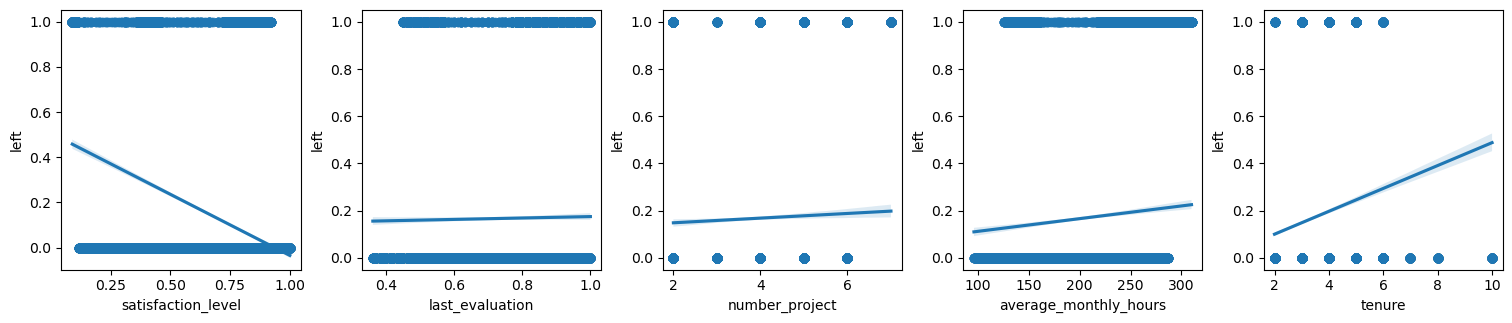

In [15]:
#Checking for potential regresion within numeric variables
numeric_dataset = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure']
f, axes = plt.subplots(1, 5, figsize=[15, 3])
plt.tight_layout(pad=0.4, w_pad=1.0, h_pad=1.0)
for n, col in enumerate(numeric_dataset):
    sns.regplot(x=col, y="left", data=df1,  ax=axes[ n % 5])

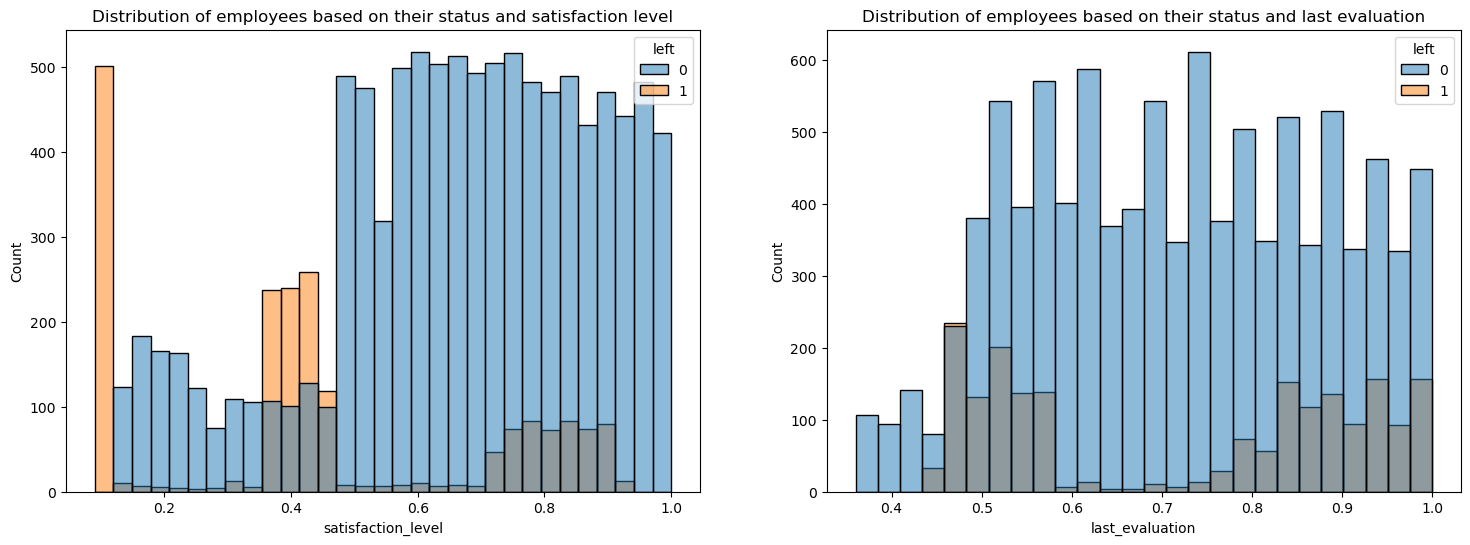

In [16]:
# Creating a plot as needed
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(data = df1, x='satisfaction_level',ax=axes[0], hue= 'left')
sns.histplot(data = df1, x='last_evaluation',ax=axes[1], hue= 'left')
axes[0].set_title('Distribution of employees based on their status and satisfaction level')
axes[1].set_title('Distribution of employees based on their status and last evaluation')
plt.show()

Employees with lower satisfatction tend to leave the company more frequently. There is another visible peak in satiscation around 0.8 but it is significantly lower than ones around 0.4 . Employees with last evaluation score between 0.6 and 0.8 were least likely to leave the company. It indicates that the worst and best performing employees are the ones who are most likely to leave the company.

left=y,  promotion= x
      0    1
0  9805  195
1  1983    8
left=y,  work_accident= x
      0     1
0  8255  1745
1  1886   105


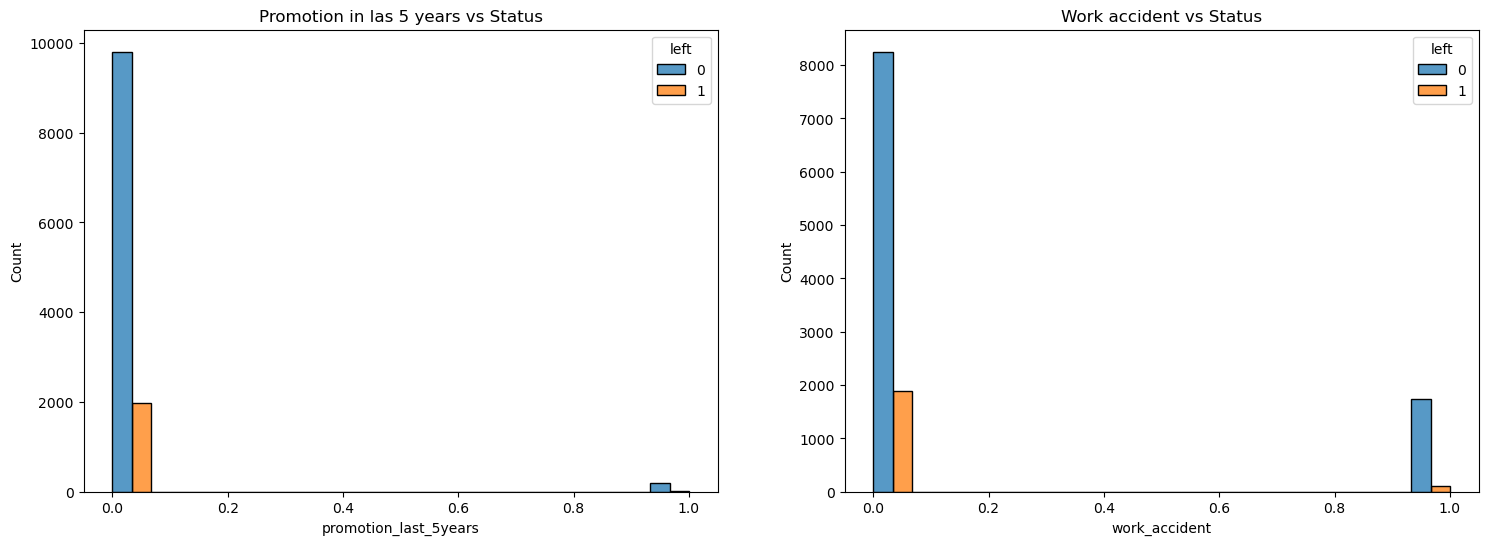

In [17]:
def df_2x2(col1, col2):
    a = df1[(df1[col1]==0) & (df1[col2]==0)].count().iloc[0]
    b = df1[(df1[col1]==0) & (df1[col2]==1)].count().iloc[0]
    c = df1[(df1[col1]==1) & (df1[col2]==0)].count().iloc[0]
    d = df1[(df1[col1]==1) & (df1[col2]==1)].count().iloc[0]

    data = [[a,b],[c,d]]

    df= pd.DataFrame(data)
    return df
print('left=y,  promotion= x')
print(df_2x2('left','promotion_last_5years'))

print('left=y,  work_accident= x')
print(df_2x2('left','work_accident'))

fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.histplot(data = df1, x='promotion_last_5years',ax=axes[0], hue= 'left', multiple= 'dodge')
sns.histplot(data = df1, x='work_accident',ax=axes[1], hue= 'left', multiple= 'dodge')
axes[0].set_title('Promotion in las 5 years vs Status')
axes[1].set_title('Work accident vs Status')
plt.show()


Although there may be some coorelation beatwin employe status ('left') and promotion/work_accident it may not be confirmed or failed to confirm at the EDA stage.

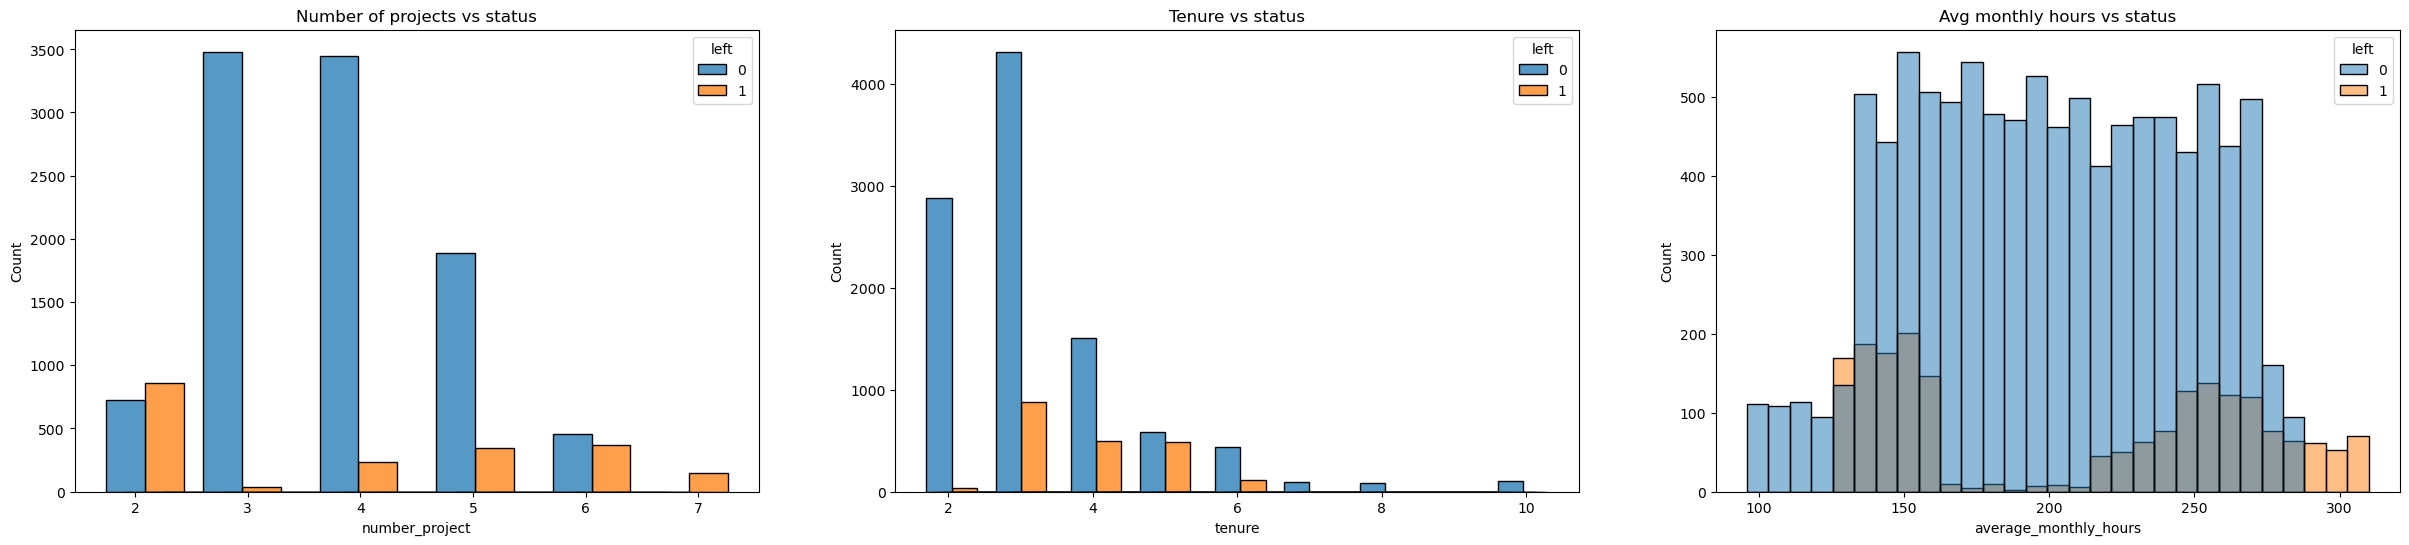

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(30,6))

sns.histplot(data = df1, x='number_project',ax=axes[0], hue= 'left', multiple= 'dodge', shrink= 4)
sns.histplot(data = df1, x='tenure',ax=axes[1], hue= 'left', multiple='dodge', shrink=8)
sns.histplot(data = df1, x='average_monthly_hours',ax=axes[2], hue= 'left')


axes[0].set_title('Number of projects vs status')
axes[1].set_title('Tenure vs status')
axes[2].set_title('Avg monthly hours vs status')
plt.show()


The most employees who left were assigned to 2 projects. The least were assingned to 3. The highest ratio of employees who left was for employees involved in 6 projects. The employees with tenure between 3 to 5 years were the ones who were the most likely to leave. The ratio of leaving employees was the highest for the employees with 5 year tenure. The least likely to leave were the employees who worked average of 160-210 monthly hours.

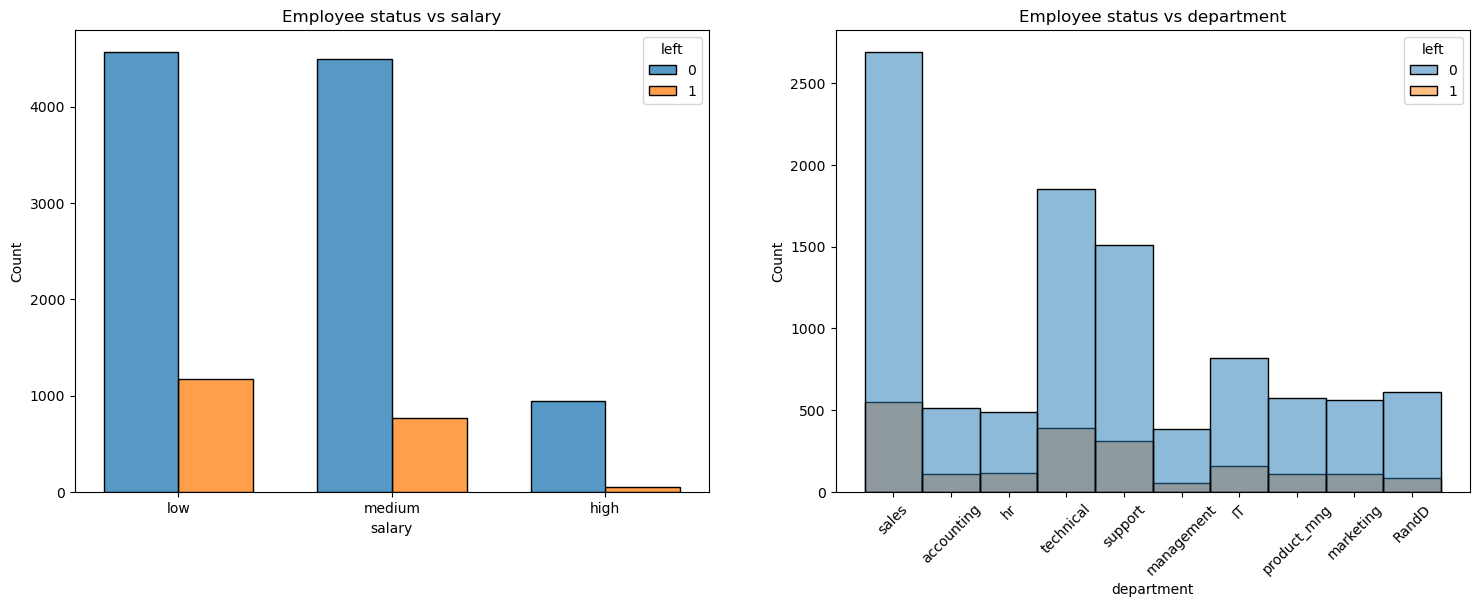

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
salary_order = ['high', 'medium', 'low']
sns.histplot(data = df1, x='salary',ax=axes[0], hue= 'left', multiple= 'dodge', shrink= 0.7)
sns.histplot(data = df1, x='department',ax=axes[1], hue= 'left')
axes[0].set_title('Employee status vs salary')
axes[1].set_title('Employee status vs department')
plt.xticks(rotation=45)
plt.show()

Employee salary level or departament does not show any relation to leaving employees (the proportion appear to be similar for all categories).

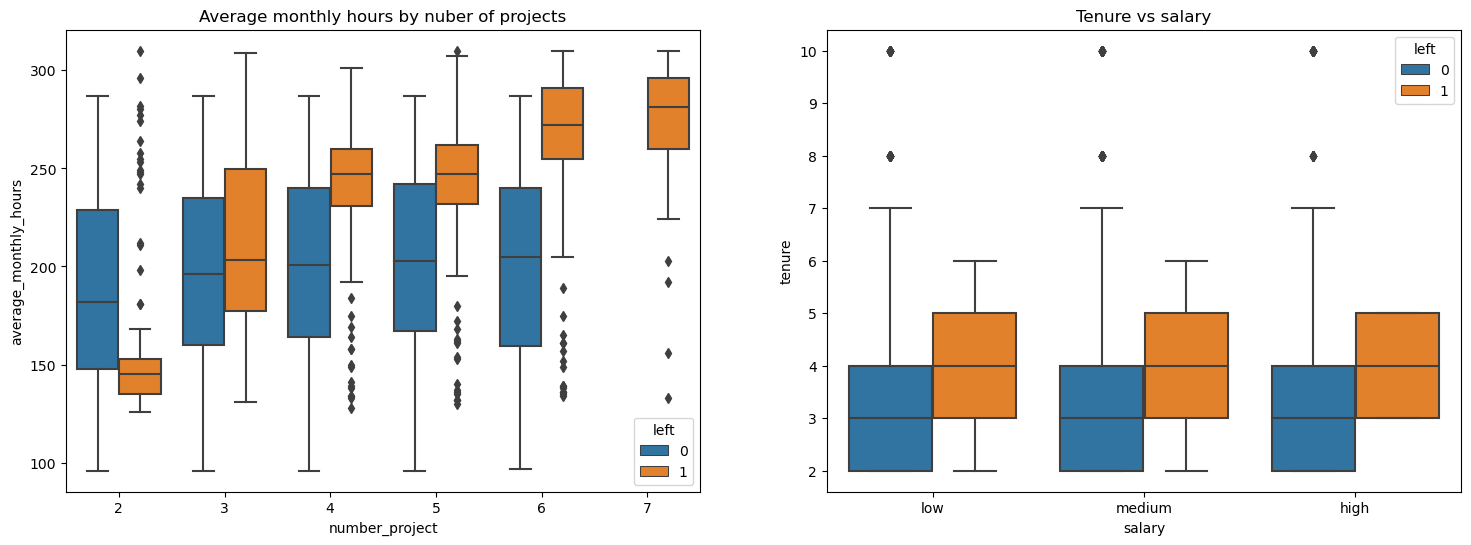

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))
sns.boxplot(data = df1, x='number_project', y='average_monthly_hours',ax=axes[0], hue= 'left')
sns.boxplot(data = df1, x='salary', y= 'tenure',ax=axes[1], hue= 'left')
axes[0].set_title('Average monthly hours by nuber of projects')
axes[1].set_title('Tenure vs salary')
plt.show()

Employees who left appear to work signifficantly more hours with 4 or more projects assigned to them. They had longer tenure on average than employees who stayed.

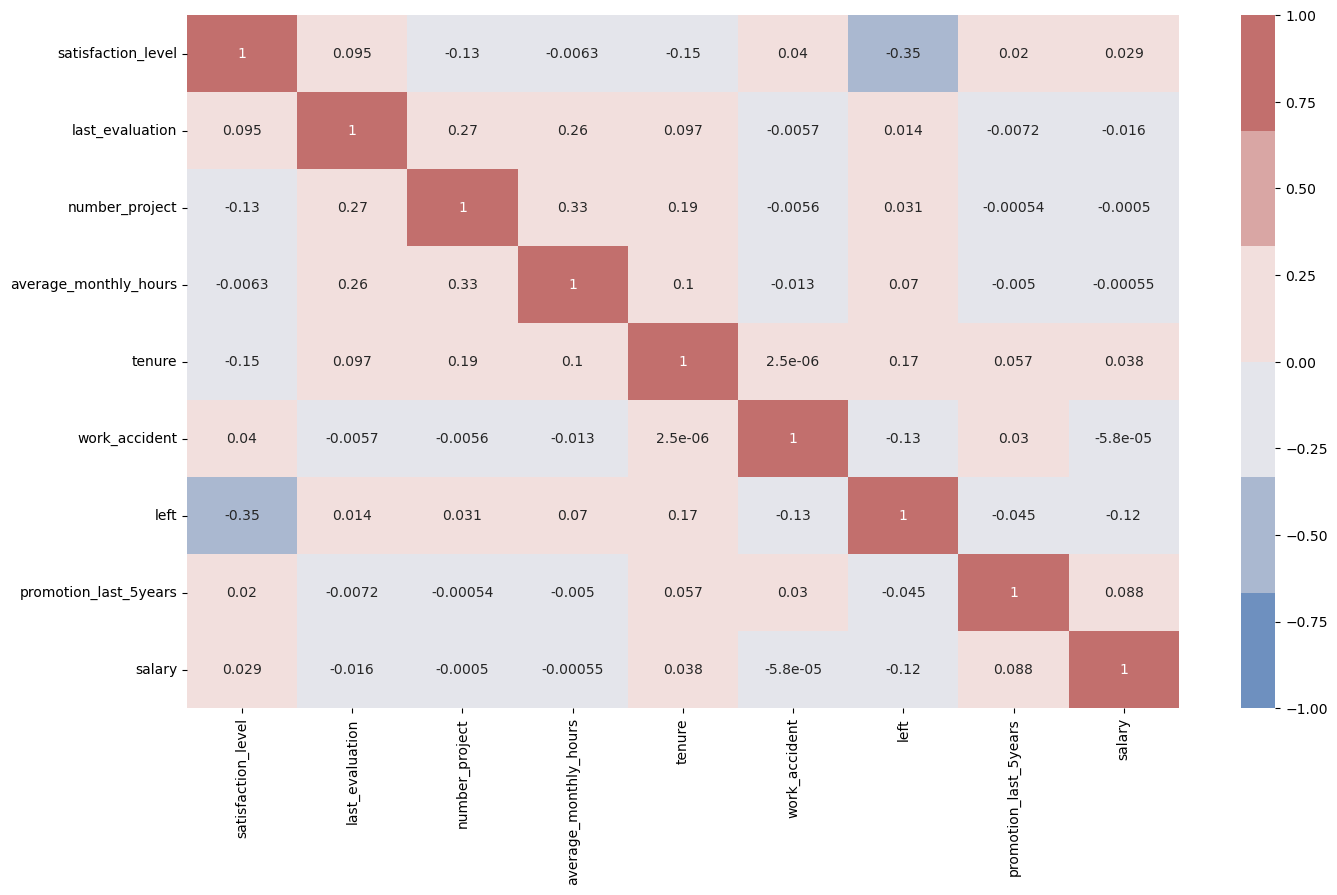

In [21]:
#Creating heatmap with correlation values
df_numeric = df1.copy().drop(columns='department')
df_numeric['salary'] = df_numeric['salary'].replace({'low':1,
                                           'medium':2,
                                           'high':3})
df_numeric['salary'] = df_numeric['salary'].astype('int')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df_numeric.corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette('vlag'))
plt.show()


Heatmap does not indicate severe multicorreality between any variables.

### Insights:

* The employes with more than 4 projects assigned to them tend to leave more frequently, especialy if they worked more hours while involved in many projects.
* The employees with low satisfaction and likely to leave (as expected).
* The employees with last evaluation grade between 0.6 and 0.8 are least likely to leave.
* The employees with 5 year tenure are most likely to leave.



# paCe: Construct Stage TODO:
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


## Checking model assumptions

**Logistic Regression model assumptions**

- Outcome variable is categorical (met)
- Observations are independent of each other (yes, each employee is a separate record)
- No severe multicollinearity among X variables (yes, checked with heatmap during step 2)
- No extreme outliers (outliers will be removed in step 3)
- Linear relationship between each X variable and the logit of the outcome variable (met)
- Sufficiently large sample size (met)



## Step 3. Model Building, Step 4. Results and Evaluation
TODO
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

## Data will be firstly modeled using Logistic regresion then the results will be compared with Decision Tree and random forest.


### Modeling

Add as many cells as you need to conduct the modeling process.

### Logistic regresion


#### Dummy encoding

In [22]:
#Establishing df with encoded data

df_enc = df1.copy()

# Encoding the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)
# Dummy encoding the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

#New dataframe check
df_enc.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


#### Eliminating outliers

In [23]:
# Eliminating outliers in tenure
df_logreg = df_enc[(df_enc['tenure'] >= low_lim) & (df_enc['tenure'] <= up_lim)]

df_logreg.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


### Setting variables

In [24]:
# Setting outside variable
y = df_logreg['left']
y.head()

0    1
2    1
3    1
4    1
5    1
Name: left, dtype: int64

In [25]:
# Setting features to be inncluded in the model
X=df_logreg.drop('left', axis=1)
X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [26]:
# Spliting data into test and traing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [27]:
# Constructing a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [28]:
#Predicting y with the above model
y_pred = log_clf.predict(X_test)

#### Displaying confusion matrix:

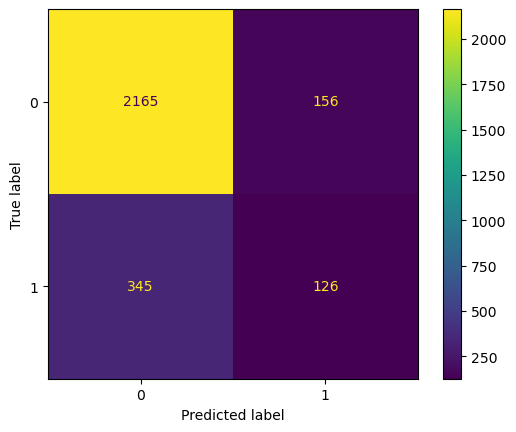

In [29]:
#Logistic regression confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)
log_disp.plot()
plt.show()

## Logistic regression model results:
* True positives: 125
* True negatives: 2168
* False positives: 153
* False negatives: 346

### Tree based model

We will be using the same df which was used to model data in logistic regression example

In [30]:
y = df_enc['left']

y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [31]:
X = df_enc.drop('left', axis=1)

X.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

#### Creating Decision tree and setting parameters.

In [33]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

# Assigning scoring metrics to capture
scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

# Instantiate GridSearch
tree1 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

#### Fitting the data to the tree

In [34]:
tree1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

#### Checking best parameters and score

In [35]:
tree1.best_params_

{'max_depth': 4, 'min_samples_leaf': 5, 'min_samples_split': 2}

In [36]:
tree1.best_score_

0.969819392792457

In [37]:
def make_results(model_name:str, model_object, metric:str):
    '''
    On training data.

    Arguments:
        model_name (string)
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, accuracy, or auc
  
    Returns a pandas df with the F1, recall, precision, accuracy, and auc scores
    for the model with the best mean 'metric' score across all validation folds.  
    '''

    #Dictionary that maps input metric to actual metric name in GridSearchCV
    metric_dict = {'auc': 'mean_test_roc_auc',
                   'precision': 'mean_test_precision',
                   'recall': 'mean_test_recall',
                   'f1': 'mean_test_f1',
                   'accuracy': 'mean_test_accuracy'
                  }

    # Putting results in a df
    cv_results = pd.DataFrame(model_object.cv_results_)

    # Isolating the row of the df with the max(metric) score
    best_estimator_results = cv_results.iloc[cv_results[metric_dict[metric]].idxmax(), :]

    # Extracting Accuracy, precision, recall, and f1 score from that row
    auc = best_estimator_results.mean_test_roc_auc
    f1 = best_estimator_results.mean_test_f1
    recall = best_estimator_results.mean_test_recall
    precision = best_estimator_results.mean_test_precision
    accuracy = best_estimator_results.mean_test_accuracy
  
    # Creating table of results
    table = pd.DataFrame()
    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision],
                          'recall': [recall],
                          'F1': [f1],
                          'accuracy': [accuracy],
                          'auc': [auc]
                        })
  
    return table

In [38]:
# Get all CV scores
tree1_cv_results = make_results('decision tree cv', tree1, 'auc')
tree1_cv_results

,model,precision,recall,F1,accuracy,auc
0,decision tree cv,0.914552,0.916949,0.915707,0.971978,0.969819


### Random forest creation and 1st Round


In [39]:
# Assigning model to 'variable'
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

rf1 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')


In [40]:
rf1.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [41]:
path = ''

### Establishing functions for future use and pickeling (saving and reading models):

In [42]:
def write_pickle(path, model_object, save_as:str):
    '''
    In: 
        path:         
        model_object: a model to pickle
        save_as: filename to save the model

    Out: A call to pickle the model in the folder indicated
    '''    

    with open(path + save_as + '.pickle', 'wb') as to_write:
        pickle.dump(model_object, to_write)

In [43]:
def read_pickle(path, saved_model_name:str):
    '''
    In: 
        path: to read from
        saved_model_name: filename of pickled model to read

    Out: 
        model
    '''
    with open(path + saved_model_name + '.pickle', 'rb') as to_read:
        model = pickle.load(to_read)

    return model

### Reading and writing pickle:

In [44]:
write_pickle(path, rf1, 'hr_rf1')

In [45]:
rf1 = read_pickle(path, 'hr_rf1')

#### Best score and parameters for the 1st random forest model

In [46]:
rf1.best_score_

0.9804250949807172

In [47]:
rf1.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'n_estimators': 500}

In [48]:
rf1_cv_results = make_results('random forest cv', rf1, 'auc')
print(tree1_cv_results)
print(rf1_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
              model  precision    recall        F1  accuracy       auc
0  random forest cv   0.950023  0.915614  0.932467  0.977983  0.980425


In [50]:
def get_scores(model_name:str, model, X_test_data, y_test_data):
    '''
    Generate a table of test scores.

    In: 
        model_name (string) 
        model:                A fit GridSearchCV object
        X_test_data:          numpy array of X_test data
        y_test_data:          numpy array of y_test data

    Out: pandas df of precision, recall, f1, accuracy, and AUC scores for your model
    '''

    preds = model.best_estimator_.predict(X_test_data)

    auc = roc_auc_score(y_test_data, preds)
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({'model': [model_name],
                          'precision': [precision], 
                          'recall': [recall],
                          'f1': [f1],
                          'accuracy': [accuracy],
                          'AUC': [auc]
                         })
  
    return table

In [51]:
# Get predictions on test data
rf1_test_scores = get_scores('random forest1 test', rf1, X_test, y_test)
rf1_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest1 test,0.964211,0.919679,0.941418,0.980987,0.956439


### Feature Engeneering (binary 'overwork' column)

Satisfaction level may not be reflect the real state of employee satisfaction as they may report whatever they want. this may skew the model and thus will be dropped for the second one.

In [52]:
# Drop `satisfaction_level` and save resulting dataframe in new variable
df2 = df_enc.drop('satisfaction_level', axis=1)

df2.head()

,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [53]:
#  Creating`overworked` column. For now, it's identical to average monthly hours.
df2['overworked'] = df2['average_monthly_hours']

# Inspecting max and min average monthly hours values
print('Max hours:', df2['overworked'].max())
print('Min hours:', df2['overworked'].min())

Max hours: 310
Min hours: 96


166.67 is approximately the average number of monthly hours for someone who works 50 weeks per year, 5 days per week, 8 hours per day.
Being overworked was defined as working more than 175 hours per month on average.

If average 'average monthly hours' will produce result 'True'(1) if is greater than 175, else it will produce result as 'False'(0). 

In [54]:
# Defining `overworked` as working > 175 hrs/week
df2['overworked'] = (df2['overworked'] > 175).astype(int)

df2['overworked'].head()

0    0
1    1
2    1
3    1
4    0
Name: overworked, dtype: int64

Dropping 'average_monthly_hours' column as it will be duplicating data 'overworked' column.

In [55]:
# Dropping the `average_monthly_hours` column
df2 = df2.drop('average_monthly_hours', axis=1)

# Displaying first few rows of resulting dataframe
df2.head()

,last_evaluation,number_project,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,overworked
0,0.53,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0
1,0.86,5,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
2,0.88,7,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False,1
3,0.87,5,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False,1
4,0.52,2,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False,0


#### Establishing outcome variable for and features for upcoming Decision tree 2nd model.

In [56]:
# Isolate the outcome variable
y = df2['left']

# Select the features
X = df2.drop('left', axis=1)

#### Spliting testing and traing data for the model.

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=0)

### 2nd Decision tree (with new feature created).

In [58]:
tree = DecisionTreeClassifier(random_state=0)

cv_params = {'max_depth':[4, 6, 8, None],
             'min_samples_leaf': [2, 5, 1],
             'min_samples_split': [2, 4, 6]
             }

scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

tree2 = GridSearchCV(tree, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [59]:
tree2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'max_depth': [4, 6, 8, None],
                         'min_samples_leaf': [2, 5, 1],
                         'min_samples_split': [2, 4, 6]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [60]:
tree2.best_params_

{'max_depth': 6, 'min_samples_leaf': 2, 'min_samples_split': 6}

In [61]:
tree2.best_score_

0.9586752505340426

### Compering results of both decision trees (training data).

In [63]:
tree2_cv_results = make_results('decision tree2 cv', tree2, 'auc')
print(tree1_cv_results)
print(tree2_cv_results)

              model  precision    recall        F1  accuracy       auc
0  decision tree cv   0.914552  0.916949  0.915707  0.971978  0.969819
               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675


Second model appears not to be better than the initial one. However, it does not include satifaction level and detailed working hours data and it performance is still satisfactory taken into account it consideres fewer features.

### Random Forest (with new feature)

In [64]:
rf = RandomForestClassifier(random_state=0)

cv_params = {'max_depth': [3,5, None], 
             'max_features': [1.0],
             'max_samples': [0.7, 1.0],
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'n_estimators': [300, 500],
             }  

scoring = ('accuracy', 'precision', 'recall', 'f1', 'roc_auc')

rf2 = GridSearchCV(rf, cv_params, scoring=scoring, cv=4, refit='roc_auc')

In [65]:
rf2.fit(X_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [3, 5, None], 'max_features': [1.0],
                         'max_samples': [0.7, 1.0],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [300, 500]},
             refit='roc_auc',
             scoring=('accuracy', 'precision', 'recall', 'f1', 'roc_auc'))

In [66]:
write_pickle(path, rf2, 'hr_rf2')

In [67]:
rf2 = read_pickle(path, 'hr_rf2')

In [68]:
rf2.best_params_

{'max_depth': 5,
 'max_features': 1.0,
 'max_samples': 0.7,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [69]:
rf2.best_score_

0.9648089938973397

## Compering results of both 2nd round models (training data).

In [70]:
rf2_cv_results = make_results('random forest2 cv', rf2, 'auc')
print(tree2_cv_results)
print(rf2_cv_results)

               model  precision    recall        F1  accuracy       auc
0  decision tree2 cv   0.856693  0.903553  0.878882  0.958523  0.958675
               model  precision    recall        F1  accuracy       auc
0  random forest2 cv   0.866758  0.878754  0.872407  0.957411  0.964809


Performence of both models is comparable. We would chose the random forest model over the other one.

In [71]:
rf2_test_scores = get_scores('random forest2 test', rf2, X_test, y_test)
rf2_test_scores

,model,precision,recall,f1,accuracy,AUC
0,random forest2 test,0.870406,0.903614,0.8867,0.961641,0.938407


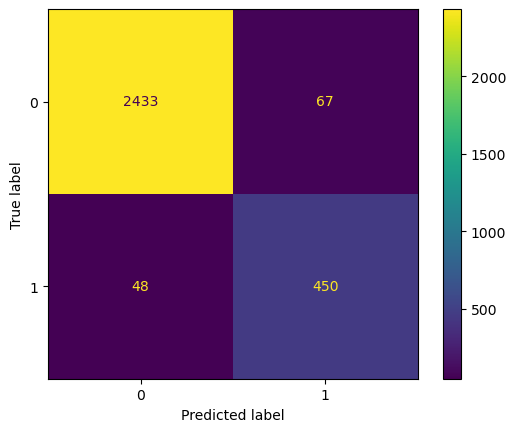

In [72]:
preds = rf2.best_estimator_.predict(X_test)
cm = confusion_matrix(y_test, preds, labels=rf2.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf2.classes_)
disp.plot(values_format='');

### Checking decision tree feature importance:

In [ ]:
tree2_importances = pd.DataFrame(tree2.best_estimator_.feature_importances_, 
                                 columns=['gini_importance'], 
                                 index=X.columns
                                )
tree2_importances = tree2_importances.sort_values(by='gini_importance', ascending=False)

# Only extract the features with importances > 0
tree2_importances = tree2_importances[tree2_importances['gini_importance'] != 0]
tree2_importances

,gini_importance
last_evaluation,0.343958
number_project,0.343385
tenure,0.215681
overworked,0.093498
department_support,0.001142
salary,0.000910
department_sales,0.000607
department_technical,0.000418
work_accident,0.000183
department_IT,0.000139


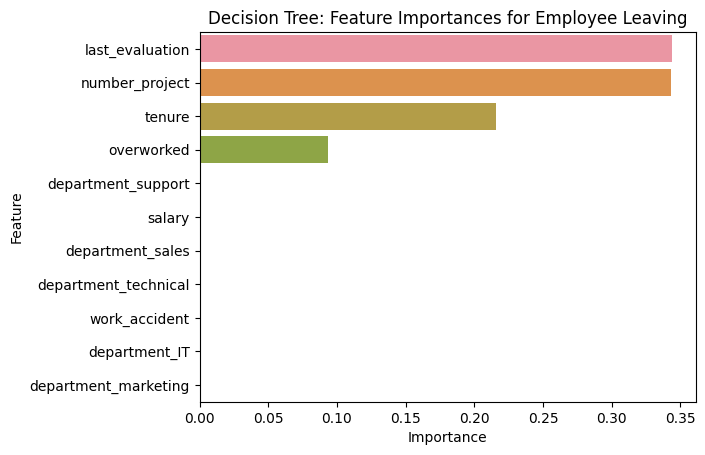

In [ ]:
sns.barplot(data=tree2_importances, x="gini_importance", y=tree2_importances.index, orient='h')
plt.title("Decision Tree: Feature Importances for Employee Leaving", fontsize=12)
plt.ylabel("Feature")
plt.xlabel("Importance")
plt.show()

Random forest feature importance plotting:

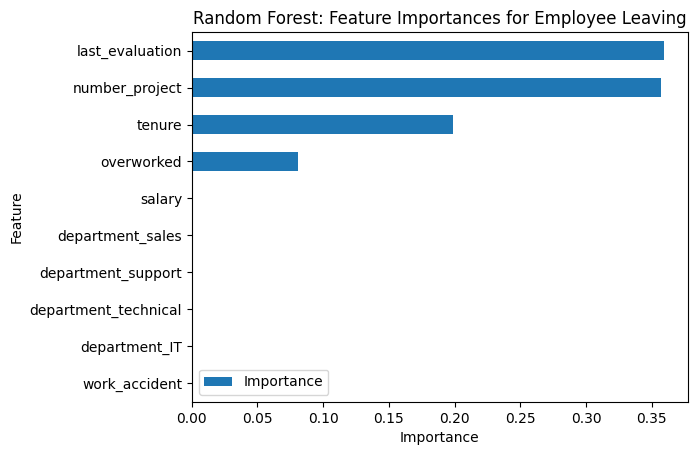

In [ ]:
# Getting feature importances
feat_impt = rf2.best_estimator_.feature_importances_

# Getting indices of top 10 features
ind = np.argpartition(rf2.best_estimator_.feature_importances_, -10)[-10:]

# Getting column labels of top 10 features 
feat = X.columns[ind]

# Filtering `feat_impt` to consist of top 10 feature importances
feat_impt = feat_impt[ind]

y_df = pd.DataFrame({"Feature":feat,"Importance":feat_impt})
y_sort_df = y_df.sort_values("Importance")
fig = plt.figure()
ax1 = fig.add_subplot(111)

y_sort_df.plot(kind='barh',ax=ax1,x="Feature",y="Importance")

ax1.set_title("Random Forest: Feature Importances for Employee Leaving", fontsize=12)
ax1.set_ylabel("Feature")
ax1.set_xlabel("Importance")

plt.show()

 Both models have the same features improtance hierarchy.

# pacE: Execute Stage




## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall**: proportion of positives that are correctly classified (data points that are predicted as True, out of all the data points that are actually True).
- **Accuracy**: proportion of data points that are correctly classified.
- **F1-score**: an aggregation of precision and recall.






## Step 4. Results and Evaluation

### Summary of model results

Both `Logistic Regresion`  and `Tree Based Machine Learing Model` were performing well, however the second one was better. `Random Forest` model was slightly better than `Decision Tree` one.

#### Conclusion

`last_evaluation`, `number_project`, `tenure`,`overworked` were the most important features in the model. Meaning those factors had the most influence on employees leaving.

#### Recommendations

1. Initiate program to ensure that the employees with `last_evaluation` scores below 0.6 are given room and tools and conditions to improve in future.
2. Provide financial bonuses for employees with `last_evaluation` scores above 0.8.
3. Ensure that employees working on multiple projects are not overworked.
4. Ensure that overworked employees are sufficiently compensated.
5. Consider increasing salary of long tenure employees who are to be kept.
